In [1]:
#%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as sts

file1 = 'data/Mouse_metadata.csv'
metadata_df = pd.read_csv(file1)

file2 = 'data/Study_results.csv'
results_df = pd.read_csv(file2)

df = pd.merge(metadata_df, results_df, how='outer')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
dups = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dups[dups == True].index #Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917], dtype='int64')
df.iloc[908:918, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
df.drop(df[df['Mouse ID'] == 'g989'].index, inplace=True)

In [4]:
tumor_vol_by_drug = df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean = tumor_vol_by_drug.mean().rename('Mean Tumor Volume (mm3)')
median = tumor_vol_by_drug.median().rename('Median Tumor Volume (mm3)')
std = tumor_vol_by_drug.std().rename('Tumor Volume (mm3) Std. Dev.')
var = tumor_vol_by_drug.var().rename('Tumor Volume (mm3) Variance')
sem = tumor_vol_by_drug.sem().rename('Tumor Volume (mm3) SEM')

summary = pd.DataFrame([mean, median, std, var, sem]).transpose()
summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Std. Dev.,Tumor Volume (mm3) Variance,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [5]:
# Using the aggregation method, produce the same summary statistics in a single line


Text(0, 0.5, 'Measurements')

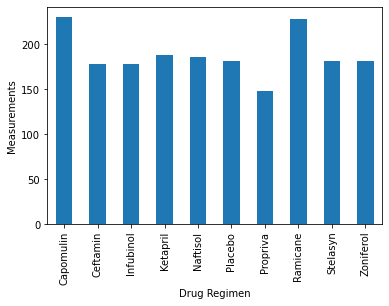

In [6]:
measurements = df.groupby('Drug Regimen')['Timepoint'].count()
pandas_bar = measurements.plot.bar()
pandas_bar.set_ylabel('Measurements')

<BarContainer object of 10 artists>

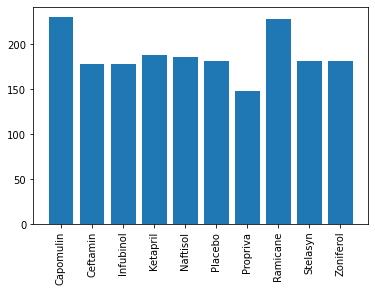

In [7]:
x_axis = np.arange(0, 10, 1)
pyplot_bar = plt.bar(x_axis, measurements)

tick_locations = [value for value in x_axis]
labels = df['Drug Regimen'].unique().tolist()
labels.sort()
plt.xticks(tick_locations, labels=labels, rotation="vertical")

pyplot_bar

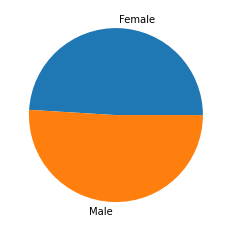

In [8]:
sexes = df.groupby('Sex')['Mouse ID'].count()
sexes = sexes.rename('')
pandas_pie = sexes.plot.pie()


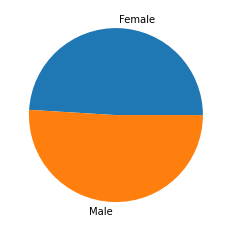

In [9]:
pyplot_pie = plt.pie(sexes, labels=['Female', 'Male'])

In [10]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ids = []
tps = []

for drug in drugs:
    drug_df = df[df['Drug Regimen'] == f'{drug}']
    mice = drug_df['Mouse ID'].unique()
    for mouse in mice:
        max_tp = drug_df[drug_df['Mouse ID'] == f'{mouse}']['Timepoint'].max()
        ids.append(f'{mouse}')
        tps.append(max_tp)        

max_tps_df = pd.DataFrame({'Mouse ID': ids, 'Last Timepoint': tps})

df = pd.merge(df, max_tps_df, on='Mouse ID', how='outer')


In [11]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ids = []
vols = []

for drug in drugs:
    drug_df = df[df['Drug Regimen'] == f'{drug}']
    mice = drug_df['Mouse ID'].unique()
    for mouse in mice:
        vol = drug_df[(drug_df['Mouse ID'] == f'{mouse}') & (drug_df['Timepoint'] == drug_df['Last Timepoint'])]['Tumor Volume (mm3)'].max()
        ids.append(f'{mouse}')
        vols.append(vol)
        
final_vols_df = pd.DataFrame({'Mouse ID': ids, 'Final Tumor Volume': vols})
df = pd.merge(df, final_vols_df, on='Mouse ID', how='outer')
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0,22.050126
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN,NaN


In [12]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
quartile_list = []
lowerqs = []
upperqs = []
iqrs = []
upperbounds = []
lowerbounds = []

for drug in drugs:
    quartiles = df[df['Drug Regimen'] == f'{drug}']['Final Tumor Volume'].quantile([0.25, 0.5, 0.75])
    quartile_list.append(quartiles)
    
for i in range(len(quartile_list)):
    lowerqs.append(quartile_list[i][0.25])
    upperqs.append(quartile_list[i][0.75])
    iqrs.append(quartile_list[i][0.75] - quartile_list[i][0.25])
    lowerbounds.append(lowerqs[i] - (1.5 * iqrs[i]))
    upperbounds.append(upperqs[i] - (1.5 * iqrs[i]))
    
print(quartile_list)
print(lowerqs)
print(upperqs)
print(iqrs)
print(lowerbounds)
print(upperbounds)

[0.25    32.377357
0.50    37.718505
0.75    40.159220
Name: Final Tumor Volume, dtype: float64, 0.25    31.095335
0.50    36.374510
0.75    38.810366
Name: Final Tumor Volume, dtype: float64, 0.25    57.031862
0.50    62.276341
0.75    66.196912
Name: Final Tumor Volume, dtype: float64, 0.25    59.741901
0.50    62.424190
0.75    64.729837
Name: Final Tumor Volume, dtype: float64]
[32.37735684, 31.09533505, 57.03186187, 59.74190064]
[40.1592203, 38.81036633, 66.19691151, 64.72983655]
[7.781863460000004, 7.715031280000002, 9.165049640000007, 4.9879359100000045]
[20.70456164999999, 19.522788129999995, 43.28428740999999, 52.25999677499999]
[28.486425109999995, 27.23781941, 52.44933705, 57.247932684999995]


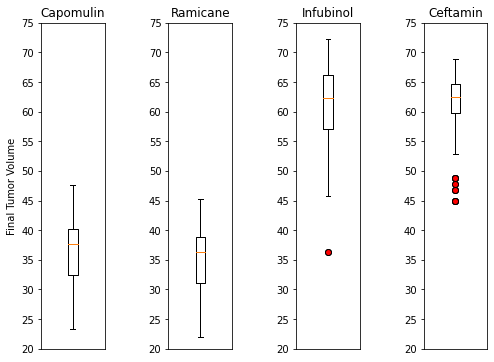

In [13]:
red = dict(markerfacecolor='r')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.boxplot(df[df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume'], flierprops=red)
ax1.set(title='Capomulin', yticks=np.arange(20, 80, step=5), xticks=[], ylabel='Final Tumor Volume')
ax2.boxplot(df[df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume'], flierprops=red)
ax2.set(title='Ramicane', yticks=np.arange(20, 80, step=5), xticks=[])
ax3.boxplot(df[df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume'], flierprops=red)
ax3.set(title='Infubinol', yticks=np.arange(20, 80, step=5), xticks=[])
ax4.boxplot(df[df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume'], flierprops=red)
ax4.set(title='Ceftamin', yticks=np.arange(20, 80, step=5), xticks=[])

fig.set_figheight(6)
fig.set_figwidth(8)
plt.subplots_adjust(wspace=1)

plt.show()

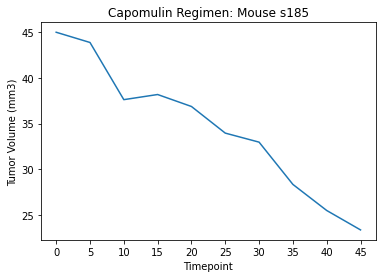

In [14]:
s185 = df[df['Mouse ID'] == 's185']
plt.plot(s185['Timepoint'], s185['Tumor Volume (mm3)'])

plt.xticks(np.arange(0, 50, step=5))
plt.title('Capomulin Regimen: Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

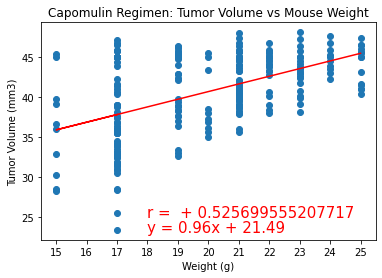

In [15]:
cap_mice = df[df['Drug Regimen'] == 'Capomulin']
plt.scatter(cap_mice['Weight (g)'], cap_mice['Tumor Volume (mm3)'])

plt.xticks(np.arange(14, 27))
plt.title('Capomulin Regimen: Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

correlation = sts.pearsonr(cap_mice['Weight (g)'],cap_mice['Tumor Volume (mm3)'])
c = f'r =  + {correlation[0]}'
plt.annotate(c,(18, 25),fontsize=15,color="red")

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mice['Weight (g)'], cap_mice['Tumor Volume (mm3)'])
reg_vals = cap_mice['Weight (g)'] * slope + intercept
plt.plot(cap_mice['Weight (g)'],reg_vals,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(18, 23),fontsize=15,color="red")

plt.show()